# Mental Health Professionals #
- Can you get help where you live?  
- Can you afford it? 
- Do you have health insurance? 
- Does your insurance cover mental health?
- If it does, does that even help?? (*Can you find a therapist? Will they return your call??*)

In [324]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [325]:
# read in kaggle data and explore it a little

# this is the mental health HPSA
mh_df = pd.read_csv('datasets/BCD_HPSA_FCT_DET_MH.csv')

# this is the metadata
meta_df = pd.read_excel('datasets/HPSA_DATAMART_METADATA.xlsx')

meta_df.head()

Attribute Name Physical Column Name  \
0        Congressional District Name         CONG_DIST_NM   
1                    State FIPS Code        STATE_FIPS_CD   
2                         State Name             STATE_NM   
3              U.S. Senator Name (2)        US_SENATE_NM2   
4  Data Warehouse Record Create Date  DW_RECORD_CREATE_DT   

                                 User Friendly Names  \
0  Congressional District Name; Cong. District; C...   
1  State FIPS Code; State Federal Information Pro...   
2  State Name; Component State; Component State N...   
3  U.S. Senator Name (2); Name of U.S. Senator; N...   
4  Data Warehouse Record Create Date; Data As-of-...   

                                          Definition Data Restriction  \
0  This attribute represents the name of the U.S....           Public   
1  This attribute represents the State Federal In...           Public   
2  This attribute represents the state or territo...           Public   
3  This attribute represents the name of one of t...           Public   
4  This attribute represents the date on which th...           Public   

                                        Organization Update Frequency  \
0                      U.S. House of Representatives      As Required   
1  National Institute of Standards and Technology...      As Required   
2  National Institute of Standards and Technology...      As Required   
3                                        U.S. Senate          Monthly   
4                                HRSA Data Warehouse      As Required   

       Data Type                             Business Rule / Format  \
0    varchar(50)                                              None.   
1     varchar(2)                                              None.   
2    varchar(50)                                              None.   
3   varchar(100)  The District of Columbia and the U.S. territor...   
4  smalldatetime                                              None.   

                                  HDW Transformation  \
0  (1) For states with two or more representative...   
1  This attribute is a common element which may b...   
2  This attribute is a common element which may b...   
3  This attribute is a common element which may b...   
4  (1) System date on which the data set was refr...   

                                        Valid Values Definition Update Date  
0  Expected values are text strings for Congressi...             2016/05/27  
1  Expected values are two character numeric text...             2020/08/15  
2  Expected values are alphabetic text strings re...             2020/08/15  
3  Expected values are text strings containing th...             2018/03/16  
4  Expected values are date time where the time i...             2021/07/29

In [326]:
meta_df.shape

(99, 12)

In [327]:
# let's make a readable table of attribute name and definition
attr_def = meta_df[['Attribute Name', 'Definition']]
attr_def.head()
for ind, row in meta_df.iterrows():
    print(row['Attribute Name'], ':\n\t', row['Definition'], '\n\n')

Congressional District Name :
	 This attribute represents the name of the U.S. Congressional District. 


State FIPS Code :
	 This attribute represents the State Federal Information Processing Standard (FIPS) code identifying the two numeric character string assigned by the National Institute of Standards and Technology (NIST) to states, the District of Columbia, and U.S. territories. 


State Name :
	 This attribute represents the state or territory name. 


U.S. Senator Name (2) :
	 This attribute represents the name of one of the two United States Senators for the state associated with the entity. 


Data Warehouse Record Create Date :
	 This attribute represents the date on which the data was processed by the HRSA Data Warehouse. 


Site Postal Code :
	 This attribute represents the U.S. Postal Service Zone Improvement Plan (ZIP) Code portion of the address of a health care facility. 


UDS Number :
	 This attribute represents the unique identification number (ID) for a health cent

In [328]:
mh_df.head()

HPSA Name     HPSA ID Designation Type HPSA Discipline Class  \
0  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
1  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
2  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
3  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
4  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   

   HPSA Score Primary State Abbreviation              HPSA Status  \
0          14                         NV  Proposed For Withdrawal   
1          14                         NV  Proposed For Withdrawal   
2          14                         NV  Proposed For Withdrawal   
3          14                         NV  Proposed For Withdrawal   
4          14                         NV  Proposed For Withdrawal   

  HPSA Designation Date HPSA Designation Last Update Date  \
0            12/22/2017                        09/10/2021   
1            12/22/2017                        09/10/2021   
2            12/22/2017                        09/10/2021   
3            12/22/2017                        09/10/2021   
4            12/22/2017                        09/10/2021   

  Metropolitan Indicator  ... Rural Status Code State Abbreviation  \
0                Unknown  ...                 N                 NV   
1                Unknown  ...                 N                 NV   
2                Unknown  ...                 N                 NV   
3                Unknown  ...                 N                 NV   
4                Unknown  ...                 N                 NV   

  State and County Federal Information Processing Standard Code  \
0                                              32031              
1                                              32031              
2                                              32031              
3                                              32031              
4                                              32031              

   State FIPS Code  State Name  U.S. - Mexico Border 100 Kilometer Indicator  \
0               32      Nevada                                             N   
1               32      Nevada                                             N   
2               32      Nevada                                             N   
3               32      Nevada                                             N   
4               32      Nevada                                             N   

  U.S. - Mexico Border County Indicator Data Warehouse Record Create Date  \
0                                     N                        02/23/2022   
1                                     N                        02/23/2022   
2                                     N                        02/23/2022   
3                                     N                        02/23/2022   
4                                     N                        02/23/2022   

  Data Warehouse Record Create Date Text Unnamed: 65  
0                             2022/02/23         NaN  
1                             2022/02/23         NaN  
2                             2022/02/23         NaN  
3                             2022/02/23         NaN  
4                             2022/02/23         NaN  

[5 rows x 66 columns]

In [329]:
print("Mental health df has shape {}".format(mh_df.shape))
print("Metadata df has shape {}".format(meta_df.shape))

Mental health df has shape (29906, 66)
Metadata df has shape (99, 12)


In [318]:
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Data columns (total 66 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   HPSA Name                                                                 29906 non-null  object 
 1   HPSA ID                                                                   29906 non-null  object 
 2   Designation Type                                                          29906 non-null  object 
 3   HPSA Discipline Class                                                     29906 non-null  object 
 4   HPSA Score                                                                29906 non-null  int64  
 5   Primary State Abbreviation                                                29906 non-null  object 
 6   HPSA Status                                                   

I'm going to mostly explore Pennsylvania, California, and Hawaii (if they are all present in this table).

In [260]:
mh_df['Common State Name'].value_counts()

California                        4347
New York                          3100
Illinois                          2086
Texas                             1861
Florida                           1617
Michigan                          1405
Nevada                            1349
Arizona                           1093
Missouri                           765
Washington                         713
Maine                              593
Tennessee                          544
North Carolina                     535
Maryland                           524
Wisconsin                          515
Pennsylvania                       500
Massachusetts                      485
Georgia                            434
Kentucky                           424
Virginia                           394
Alaska                             375
Indiana                            347
Connecticut                        343
Oklahoma                           338
Iowa                               337
Ohio                     

In [261]:
mh_df.columns

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'HPSA Discipline Class',
       'HPSA Score', 'Primary State Abbreviation', 'HPSA Status',
       'HPSA Designation Date', 'HPSA Designation Last Update Date',
       'Metropolitan Indicator', 'HPSA Geography Identification Number',
       'HPSA Degree of Shortage', 'Withdrawn Date', 'HPSA FTE',
       'HPSA Designation Population', '% of Population Below 100% Poverty',
       'HPSA Formal Ratio', 'HPSA Population Type', 'Primary HHS Region Name',
       'Rural Status', 'Longitude', 'Latitude',
       'BHCMIS Organization Identification Number', 'Break in Designation',
       'Common County Name', 'Common Postal Code', 'Common Region Name',
       'Common State Abbreviation', 'Common State County FIPS Code',
       'Common State FIPS Code', 'Common State Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code',
       'Discipline Class Number', 'HPSA Address', 'HPSA City',
     

In [262]:
mh_df['State Name'].value_counts()

California                        4347
New York                          3100
Illinois                          2086
Texas                             1861
Florida                           1617
Michigan                          1405
Nevada                            1349
Arizona                           1093
Missouri                           765
Washington                         713
Maine                              593
Tennessee                          544
North Carolina                     535
Maryland                           524
Wisconsin                          515
Pennsylvania                       500
Massachusetts                      485
Georgia                            434
Kentucky                           424
Virginia                           394
Alaska                             375
Indiana                            347
Connecticut                        343
Oklahoma                           338
Iowa                               337
Ohio                     

In [263]:
mh_df['Common State Name'].value_counts().equals(mh_df['State Name'].value_counts())

True

Actally, let's look at all of the states' data for now.  We can drop columns that contain identical data.

In [264]:
# start keeping desired columns
# All 29906 records were created on 2022-02-23, so get rid of both columns
mh = mh_df.copy()
mh.drop(['Data Warehouse Record Create Date', 'Data Warehouse Record Create Date Text'], axis=1, inplace=True)
mh.columns

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'HPSA Discipline Class',
       'HPSA Score', 'Primary State Abbreviation', 'HPSA Status',
       'HPSA Designation Date', 'HPSA Designation Last Update Date',
       'Metropolitan Indicator', 'HPSA Geography Identification Number',
       'HPSA Degree of Shortage', 'Withdrawn Date', 'HPSA FTE',
       'HPSA Designation Population', '% of Population Below 100% Poverty',
       'HPSA Formal Ratio', 'HPSA Population Type', 'Primary HHS Region Name',
       'Rural Status', 'Longitude', 'Latitude',
       'BHCMIS Organization Identification Number', 'Break in Designation',
       'Common County Name', 'Common Postal Code', 'Common Region Name',
       'Common State Abbreviation', 'Common State County FIPS Code',
       'Common State FIPS Code', 'Common State Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code',
       'Discipline Class Number', 'HPSA Address', 'HPSA City',
     

In [265]:
# I'll just keep the border indicator that also says 100 Kilometer
# it has almost the exact same information as the one without 100 Kilometer
# googling it, it seems to usually include the 100km
mh.drop('U.S. - Mexico Border County Indicator', axis=1, inplace=True)
mh.columns

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'HPSA Discipline Class',
       'HPSA Score', 'Primary State Abbreviation', 'HPSA Status',
       'HPSA Designation Date', 'HPSA Designation Last Update Date',
       'Metropolitan Indicator', 'HPSA Geography Identification Number',
       'HPSA Degree of Shortage', 'Withdrawn Date', 'HPSA FTE',
       'HPSA Designation Population', '% of Population Below 100% Poverty',
       'HPSA Formal Ratio', 'HPSA Population Type', 'Primary HHS Region Name',
       'Rural Status', 'Longitude', 'Latitude',
       'BHCMIS Organization Identification Number', 'Break in Designation',
       'Common County Name', 'Common Postal Code', 'Common Region Name',
       'Common State Abbreviation', 'Common State County FIPS Code',
       'Common State FIPS Code', 'Common State Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code',
       'Discipline Class Number', 'HPSA Address', 'HPSA City',
     

In [266]:
mh.head()

HPSA Name     HPSA ID Designation Type HPSA Discipline Class  \
0  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
1  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
2  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
3  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   
4  MHCA-Urban Washoe  7322377683  HPSA Population         Mental Health   

   HPSA Score Primary State Abbreviation              HPSA Status  \
0          14                         NV  Proposed For Withdrawal   
1          14                         NV  Proposed For Withdrawal   
2          14                         NV  Proposed For Withdrawal   
3          14                         NV  Proposed For Withdrawal   
4          14                         NV  Proposed For Withdrawal   

  HPSA Designation Date HPSA Designation Last Update Date  \
0            12/22/2017                        09/10/2021   
1            12/22/2017                        09/10/2021   
2            12/22/2017                        09/10/2021   
3            12/22/2017                        09/10/2021   
4            12/22/2017                        09/10/2021   

  Metropolitan Indicator  ... Primary State FIPS Code Primary State Name  \
0                Unknown  ...                      32             Nevada   
1                Unknown  ...                      32             Nevada   
2                Unknown  ...                      32             Nevada   
3                Unknown  ...                      32             Nevada   
4                Unknown  ...                      32             Nevada   

  Provider Type  Rural Status Code  State Abbreviation  \
0  Psychiatrist                  N                  NV   
1  Psychiatrist                  N                  NV   
2  Psychiatrist                  N                  NV   
3  Psychiatrist                  N                  NV   
4  Psychiatrist                  N                  NV   

   State and County Federal Information Processing Standard Code  \
0                                              32031               
1                                              32031               
2                                              32031               
3                                              32031               
4                                              32031               

  State FIPS Code State Name U.S. - Mexico Border 100 Kilometer Indicator  \
0              32     Nevada                                            N   
1              32     Nevada                                            N   
2              32     Nevada                                            N   
3              32     Nevada                                            N   
4              32     Nevada                                            N   

  Unnamed: 65  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 63 columns]

Actually let's do this to find columns that are the same.

In [267]:
mh.shape

(29906, 63)

In [268]:
mh.iloc[3]

HPSA Name                                                        MHCA-Urban Washoe
HPSA ID                                                                 7322377683
Designation Type                                                   HPSA Population
HPSA Discipline Class                                                Mental Health
HPSA Score                                                                      14
                                                                       ...        
State and County Federal Information Processing Standard Code                32031
State FIPS Code                                                                 32
State Name                                                                  Nevada
U.S. - Mexico Border 100 Kilometer Indicator                                     N
Unnamed: 65                                                                    NaN
Name: 3, Length: 63, dtype: object

In [269]:
mh.iloc[:,3]

0        Mental Health
1        Mental Health
2        Mental Health
3        Mental Health
4        Mental Health
             ...      
29901    Mental Health
29902    Mental Health
29903    Mental Health
29904    Mental Health
29905    Mental Health
Name: HPSA Discipline Class, Length: 29906, dtype: object

In [270]:
mh['HPSA Discipline Class'].value_counts()

Mental Health    29906
Name: HPSA Discipline Class, dtype: int64

In [271]:
# all records have the same value
mh.drop('HPSA Discipline Class', axis=1, inplace=True)

In [272]:
all_same = [col for col in mh.columns if len(mh[col].value_counts())==1]

In [273]:
mh[all_same]

Metropolitan Indicator Break in Designation  Discipline Class Number  \
0                    Unknown                    N                        7   
1                    Unknown                    N                        7   
2                    Unknown                    N                        7   
3                    Unknown                    N                        7   
4                    Unknown                    N                        7   
...                      ...                  ...                      ...   
29901                Unknown                    N                        7   
29902                Unknown                    N                        7   
29903                Unknown                    N                        7   
29904                Unknown                    N                        7   
29905                Unknown                    N                        7   

       HPSA Metropolitan Indicator Code  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  
...                                 ...  
29901                                 0  
29902                                 0  
29903                                 0  
29904                                 0  
29905                                 0  

[29906 rows x 4 columns]

In [274]:
# Drop all columns that all have the same value
mh.drop(all_same, axis=1, inplace=True)

For all of the columns left, let's see if any of them are the same.

In [275]:
mh.shape[1]

58

Okay let's just write a function.

In [276]:
def get_dup_col_names(df):
    """ This will return the column names of columns that have
        duplicate values
        It takes a dataframe as an argument """
    num_cols = df.shape[1]
    
    # initialize list that will contain column names
    dup_cols_names = []
    first_col_names = []
    
    # Loop through and compare the ith column to every column after it
    for i in range(num_cols):
        ith_col = df.iloc[:,i]
        for j in range(i+1, num_cols):
            jth_col = df.iloc[:,j]
            if ith_col.equals(jth_col):
                first_col_names.append(df.columns.values[i]) 
                dup_cols_names.append(df.columns.values[j])   # df.columns.values is an array of column names
    
    for k in range(len(first_col_names)):
        print("Column:\t{}\tis the same as\t column:\t{}".format(first_col_names[k], dup_cols_names[k]))
        
    return first_col_names, dup_cols_names, 
            

In [277]:
dup_col_1, dup_col_2 = get_dup_col_names(mh)

Column:	Common State Abbreviation	is the same as	 column:	State Abbreviation
Column:	Common State FIPS Code	is the same as	 column:	State FIPS Code
Column:	Common State Name	is the same as	 column:	State Name


In [278]:
# drop the duplicates - we'll drop the ones that start with Common to keep the shorter names
dup_col_1


['Common State Abbreviation', 'Common State FIPS Code', 'Common State Name']

In [279]:
mh.drop(dup_col_1, axis=1, inplace=True)
mh.shape

(29906, 55)

## EDA ##

In [280]:
sns.set()
sns.set_style('whitegrid')

In [281]:
%matplotlib inline

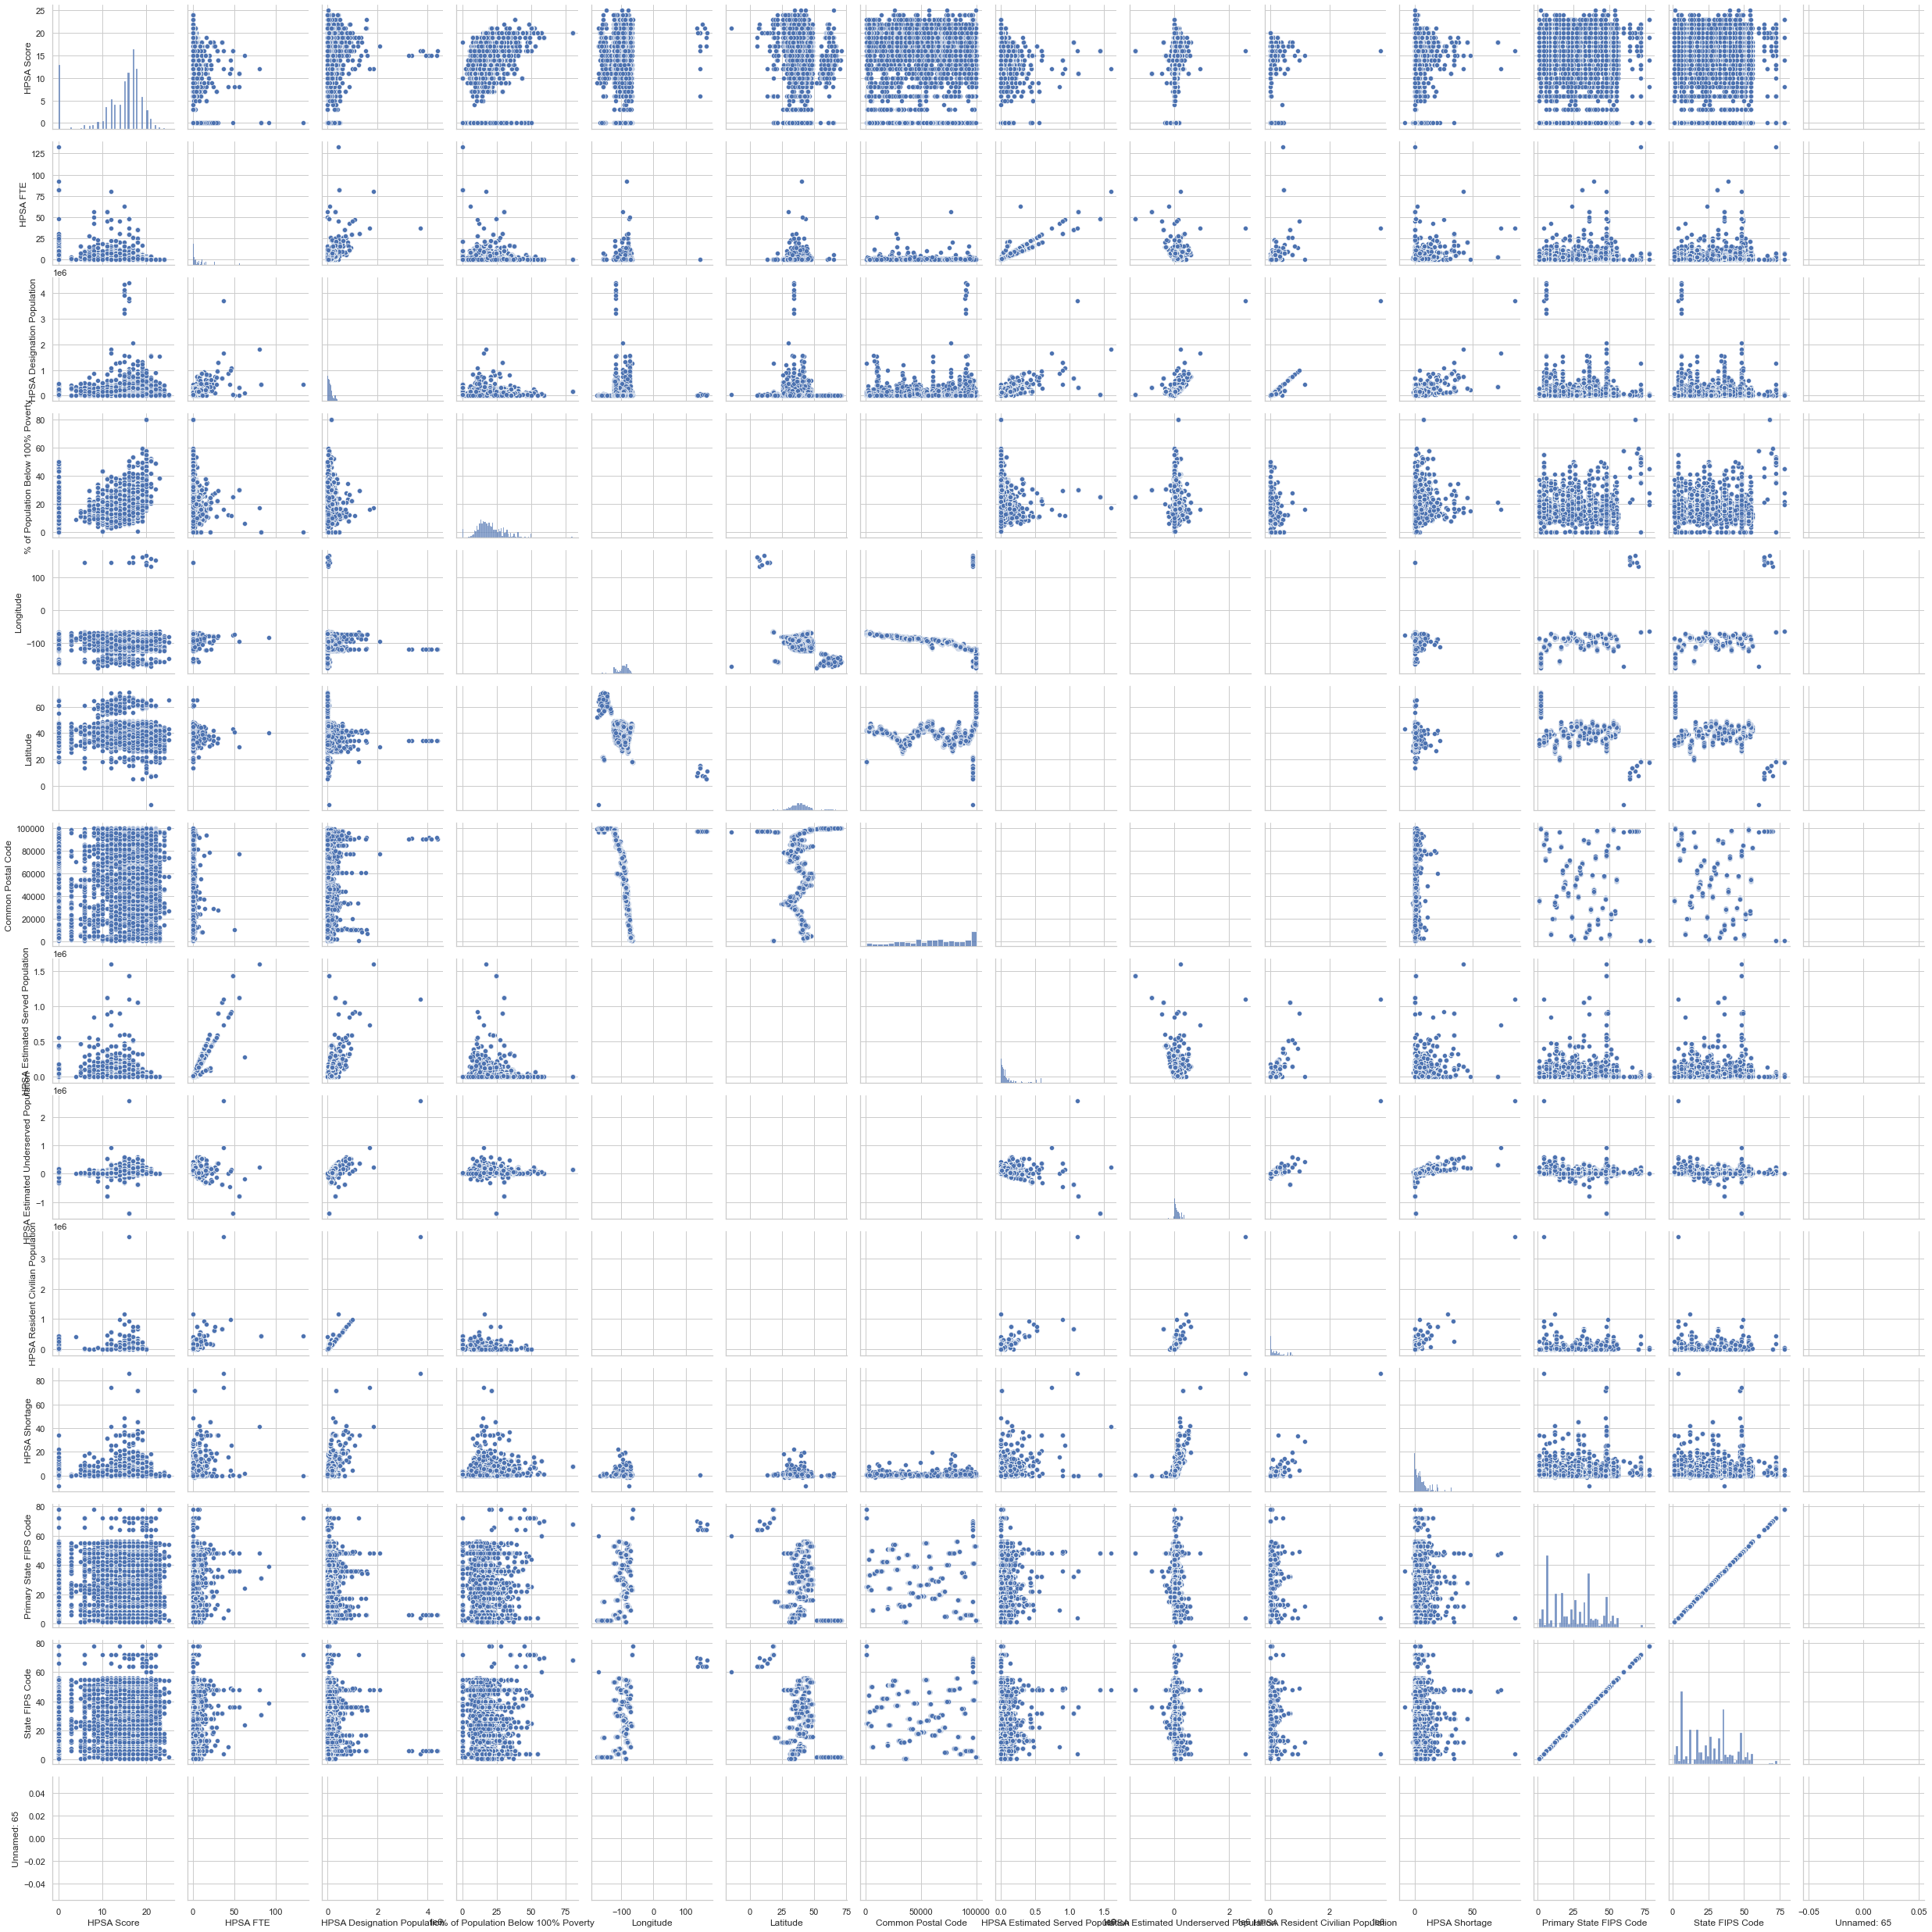

In [282]:
sns.pairplot(mh);

In [283]:
mh = mh.iloc[:,:-1]

In [284]:
mh.iloc[:,-1].value_counts()

N    29055
Y      800
U       51
Name: U.S. - Mexico Border 100 Kilometer Indicator, dtype: int64

In [285]:
[col for col in mh.columns if "Code" in col]

['Common Postal Code',
 'Common State County FIPS Code',
 'County or County Equivalent Federal Information Processing Standard Code',
 'HPSA Component Type Code',
 'HPSA Population Type Code',
 'HPSA Postal Code',
 'HPSA Status Code',
 'HPSA Type Code',
 'Primary State FIPS Code',
 'Rural Status Code',
 'State and County Federal Information Processing Standard Code',
 'State FIPS Code']

Some of these may be important, like postal codes.  Others may just be more like identifiers rather than helpful information.

In [286]:
code_cols = [col for col in mh.columns if "Code" in col]
mh[code_cols]

Common Postal Code Common State County FIPS Code  \
0                     NaN                         32031   
1                     NaN                         32031   
2                     NaN                         32031   
3                     NaN                         32031   
4                     NaN                         32031   
...                   ...                           ...   
29901             56633.0                         27021   
29902             56437.0                         27153   
29903             56221.0                         27149   
29904             56240.0                         27011   
29905             55082.0                         27163   

      County or County Equivalent Federal Information Processing Standard Code  \
0                                                    031                         
1                                                    031                         
2                                                    031                         
3                                                    031                         
4                                                    031                         
...                                                  ...                         
29901                                                021                         
29902                                                153                         
29903                                                149                         
29904                                                011                         
29905                                                163                         

      HPSA Component Type Code HPSA Population Type Code HPSA Postal Code  \
0                           CT                        LI              NaN   
1                           CT                        LI              NaN   
2                           CT                        LI              NaN   
3                           CT                        LI              NaN   
4                           CT                        LI              NaN   
...                        ...                       ...              ...   
29901                      UNK                       NaN       56633-3360   
29902                      UNK                       NaN       56437-0067   
29903                      UNK                       NaN            56221   
29904                      UNK                       NaN       56240-4845   
29905                      UNK                       NaN       55082-1117   

      HPSA Status Code HPSA Type Code  Primary State FIPS Code  \
0                    P       Hpsa Pop                       32   
1                    P       Hpsa Pop                       32   
2                    P       Hpsa Pop                       32   
3                    P       Hpsa Pop                       32   
4                    P       Hpsa Pop                       32   
...                ...            ...                      ...   
29901                D            ITU                       27   
29902                D            RHC                       27   
29903                W            RHC                       27   
29904                D            RHC                       27   
29905                W           PRSN                       27   

      Rural Status Code  \
0                     N   
1                     N   
2                     N   
3                     N   
4                     N   
...                 ...   
29901                 R   
29902                 R   
29903                 R   
29904                 R   
29905                 N   

      State and County Federal Information Processing Standard Code  \
0                                                  32031              
1                                                  32031              
2                                                  32031 

In [287]:
# Keep only one zip code, one state county FIPS code, drop separate state and county FIPS codes
drop_codes = ['HPSA Postal Code','State and County Federal Information Processing Standard Code','County or County Equivalent Federal Information Processing Standard Code','Primary State FIPS Code','State FIPS Code']
mh.drop(drop_codes, axis=1, inplace=True)
mh.shape

(29906, 49)

In [288]:
meta_df.describe()

Attribute Name Physical Column Name  \
count              99                   99   
unique             98                   99   
top            County         CONG_DIST_NM   
freq                2                    1   

                                      User Friendly Names  \
count                                                  99   
unique                                                 99   
top     Congressional District Name; Cong. District; C...   
freq                                                    1   

                                               Definition Data Restriction  \
count                                                  99               99   
unique                                                 95                2   
top     This attribute represents the name of one of t...           Public   
freq                                                    2               98   

               Organization Update Frequency    Data Type  \
count                    99               99           99   
unique                   12                5           20   
top     HRSA Data Warehouse            Daily  varchar(50)   
freq                     51               73           18   

       Business Rule / Format HDW Transformation  \
count                      99                 99   
unique                     19                 47   
top                     None.              None.   
freq                       79                 25   

                                             Valid Values  \
count                                                  99   
unique                                                 66   
top     Expected values are integers. For example, 1; ...   
freq                                                    8   

       Definition Update Date  
count                      99  
unique                     17  
top                2016/05/01  
freq                       31

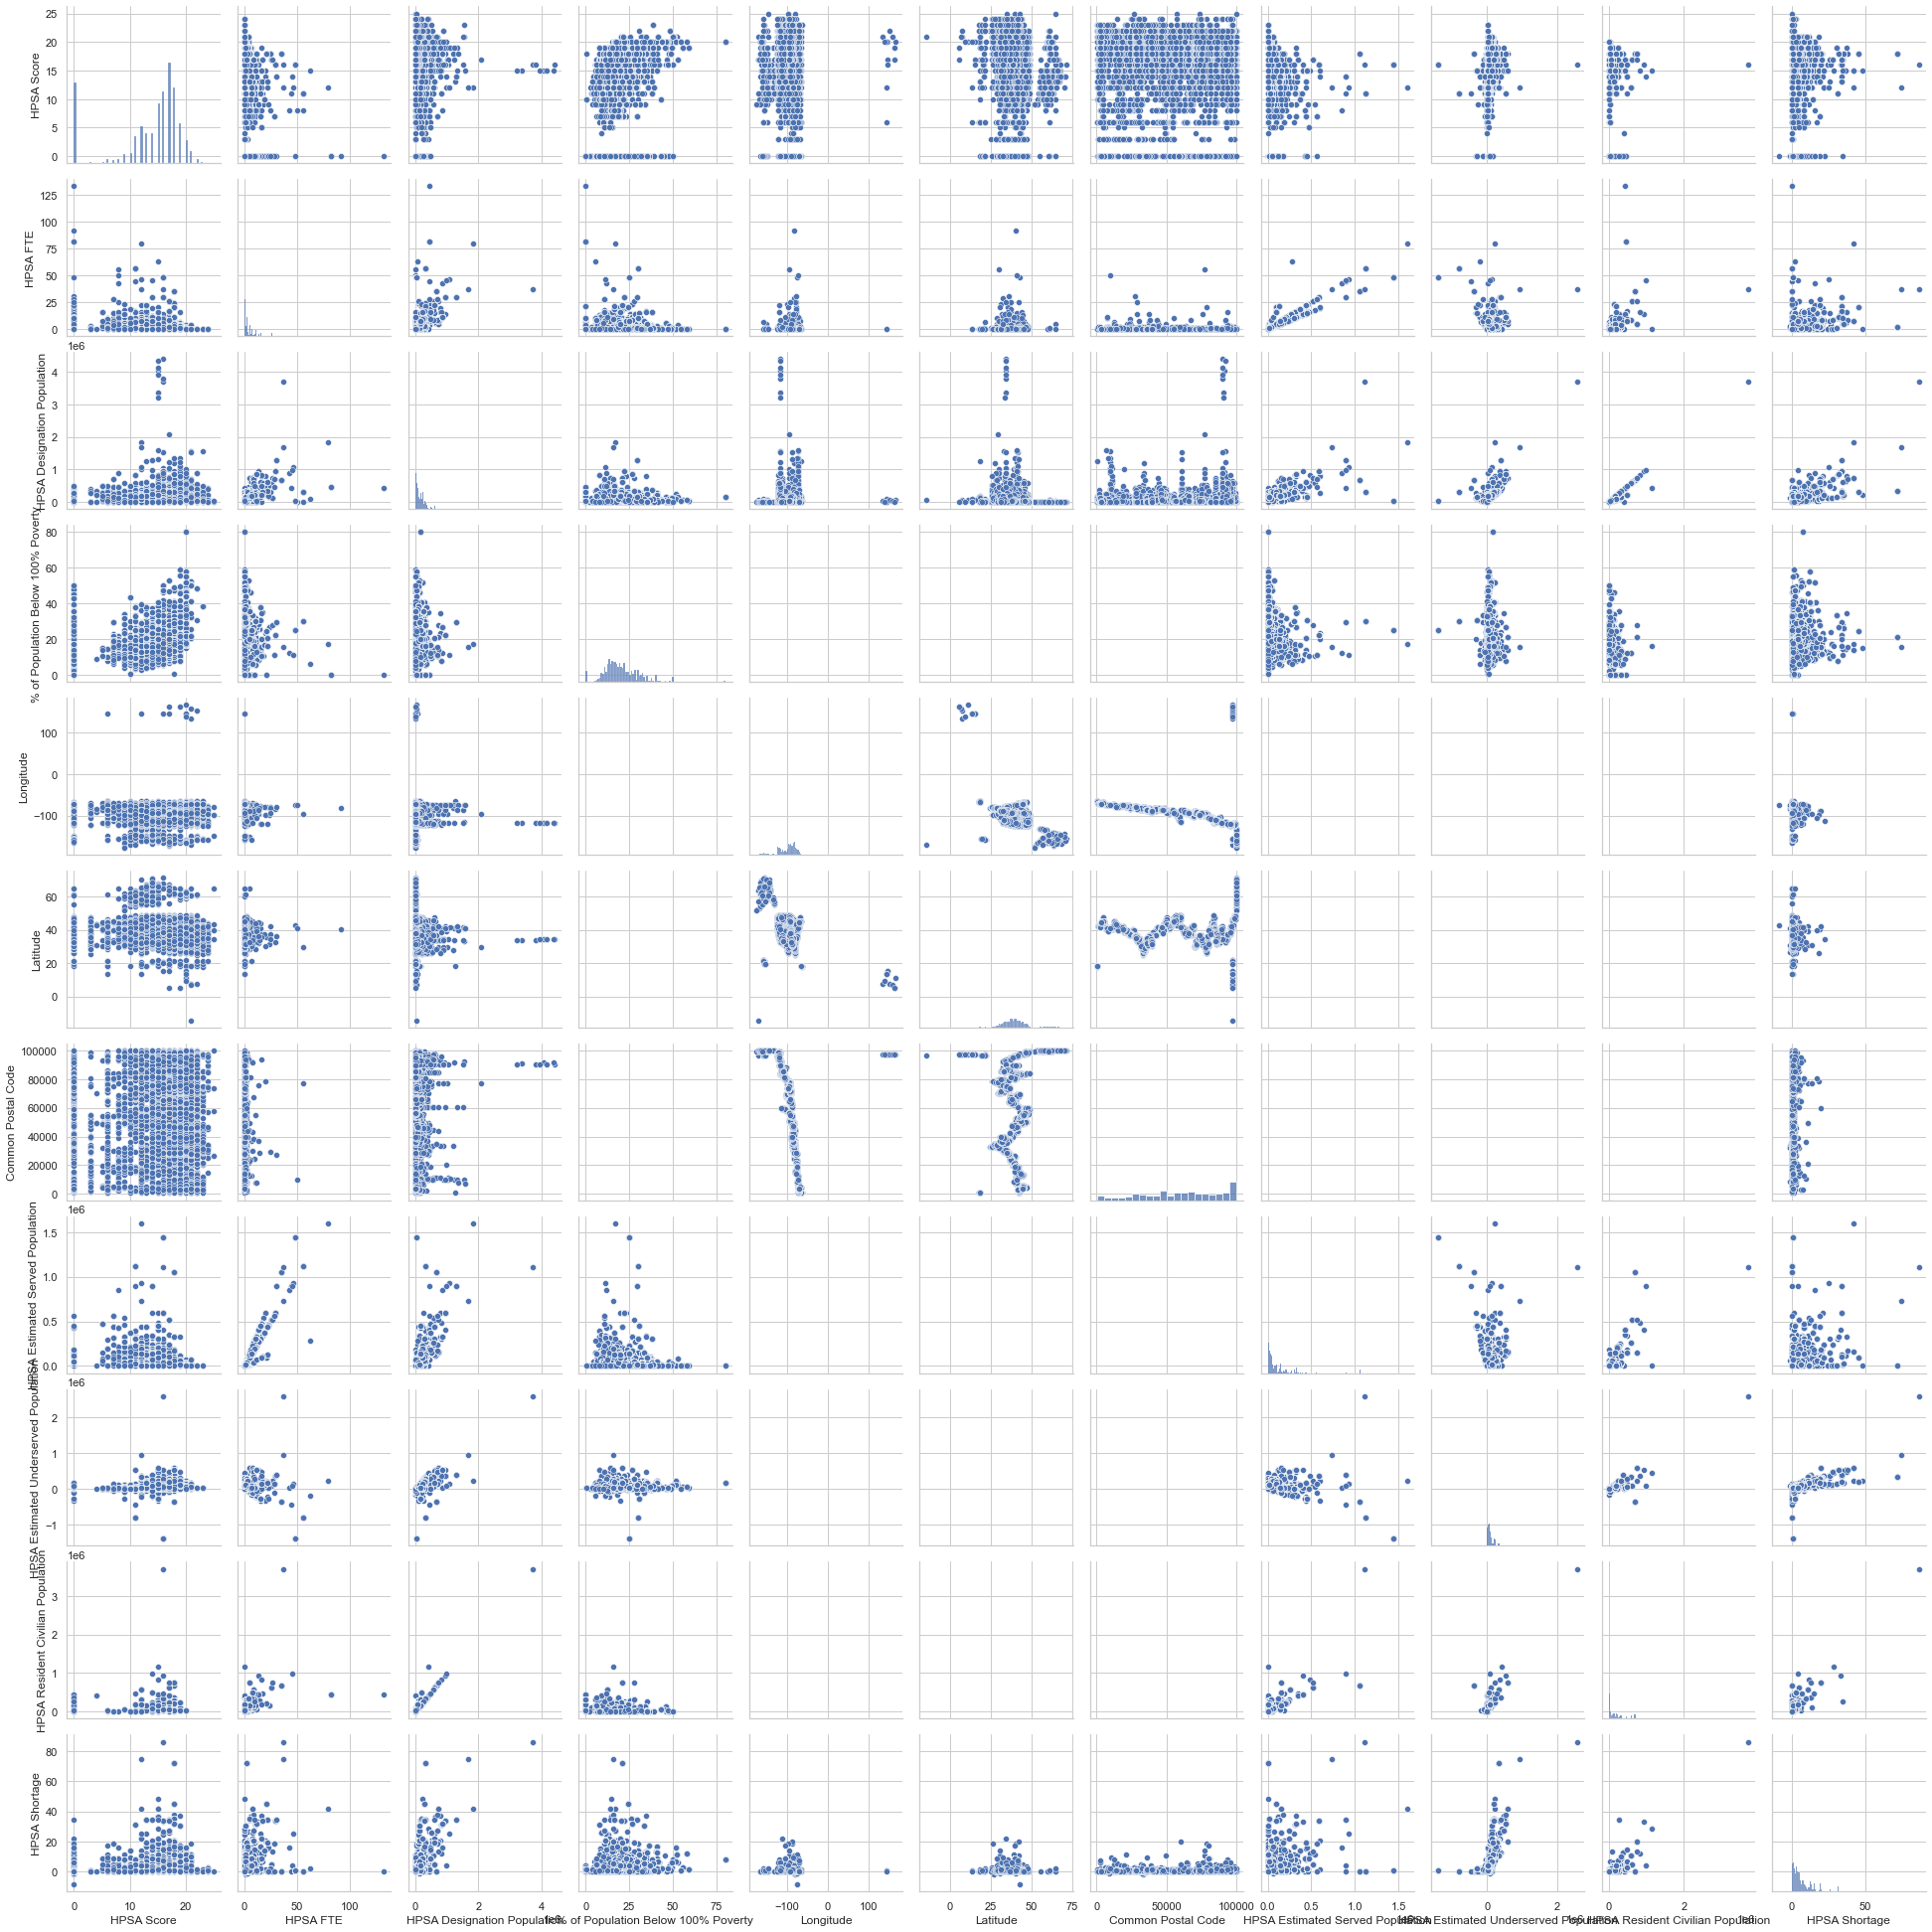

In [289]:
sns.pairplot(mh);

In [290]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HPSA Name                                     29906 non-null  object 
 1   HPSA ID                                       29906 non-null  object 
 2   Designation Type                              29906 non-null  object 
 3   HPSA Score                                    29906 non-null  int64  
 4   Primary State Abbreviation                    29906 non-null  object 
 5   HPSA Status                                   29906 non-null  object 
 6   HPSA Designation Date                         29906 non-null  object 
 7   HPSA Designation Last Update Date             29906 non-null  object 
 8   HPSA Geography Identification Number          29906 non-null  object 
 9   HPSA Degree of Shortage                       24065 non-null 

In [294]:
# see if some object columns should be numeric or vice versa
cat_cols = [col for col in mh.columns if mh[col].dtype=='object']
numer_df = mh.drop(cat_cols, axis=1)
len(cat_cols)

38

In [295]:
mh.columns

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'HPSA Score',
       'Primary State Abbreviation', 'HPSA Status', 'HPSA Designation Date',
       'HPSA Designation Last Update Date',
       'HPSA Geography Identification Number', 'HPSA Degree of Shortage',
       'Withdrawn Date', 'HPSA FTE', 'HPSA Designation Population',
       '% of Population Below 100% Poverty', 'HPSA Formal Ratio',
       'HPSA Population Type', 'Primary HHS Region Name', 'Rural Status',
       'Longitude', 'Latitude', 'BHCMIS Organization Identification Number',
       'Common County Name', 'Common Postal Code', 'Common Region Name',
       'Common State County FIPS Code', 'County Equivalent Name',
       'HPSA Address', 'HPSA City', 'HPSA Component Name',
       'HPSA Component Source Identification Number',
       'HPSA Component State Abbreviation', 'HPSA Component Type Code',
       'HPSA Component Type Description',
       'HPSA Designation Population Type Description',
       'HPSA Estimated Served Popu

In [296]:
mh.shape

(29906, 49)

In [297]:
numer_df.shape[1]

11

In [298]:
cat_df = mh[cat_cols]
cat_df.head()

HPSA Name     HPSA ID Designation Type Primary State Abbreviation  \
0  MHCA-Urban Washoe  7322377683  HPSA Population                         NV   
1  MHCA-Urban Washoe  7322377683  HPSA Population                         NV   
2  MHCA-Urban Washoe  7322377683  HPSA Population                         NV   
3  MHCA-Urban Washoe  7322377683  HPSA Population                         NV   
4  MHCA-Urban Washoe  7322377683  HPSA Population                         NV   

               HPSA Status HPSA Designation Date  \
0  Proposed For Withdrawal            12/22/2017   
1  Proposed For Withdrawal            12/22/2017   
2  Proposed For Withdrawal            12/22/2017   
3  Proposed For Withdrawal            12/22/2017   
4  Proposed For Withdrawal            12/22/2017   

  HPSA Designation Last Update Date HPSA Geography Identification Number  \
0                        09/10/2021                          32031001702   
1                        09/10/2021                          32031001300   
2                        09/10/2021                          32031001501   
3                        09/10/2021                          32031001400   
4                        09/10/2021                          32031003000   

  HPSA Degree of Shortage Withdrawn Date  ... HPSA Provider Ratio Goal  \
0          Not applicable            NaN  ...                  20000:1   
1          Not applicable            NaN  ...                  20000:1   
2          Not applicable            NaN  ...                  20000:1   
3          Not applicable            NaN  ...                  20000:1   
4          Not applicable            NaN  ...                  20000:1   

  HPSA Status Code HPSA Type Code HPSA Withdrawn Date String  \
0                P       Hpsa Pop                        NaN   
1                P       Hpsa Pop                        NaN   
2                P       Hpsa Pop                        NaN   
3                P       Hpsa Pop                        NaN   
4                P       Hpsa Pop                        NaN   

  Primary State Name Provider Type Rural Status Code State Abbreviation  \
0             Nevada  Psychiatrist                 N                 NV   
1             Nevada  Psychiatrist                 N                 NV   
2             Nevada  Psychiatrist                 N                 NV   
3             Nevada  Psychiatrist                 N                 NV   
4             Nevada  Psychiatrist                 N                 NV   

  State Name U.S. - Mexico Border 100 Kilometer Indicator  
0     Nevada                                            N  
1     Nevada                                            N  
2     Nevada                                            N  
3     Nevada                                            N  
4     Nevada                                            N  

[5 rows x 38 columns]

In [299]:
numer_df.head()

HPSA Score  HPSA FTE  HPSA Designation Population  \
0          14       4.9                     123803.0   
1          14       4.9                     123803.0   
2          14       4.9                     123803.0   
3          14       4.9                     123803.0   
4          14       4.9                     123803.0   

   % of Population Below 100% Poverty  Longitude  Latitude  \
0                                21.9        NaN       NaN   
1                                21.9        NaN       NaN   
2                                21.9        NaN       NaN   
3                                21.9        NaN       NaN   
4                                21.9        NaN       NaN   

   Common Postal Code  HPSA Estimated Served Population  \
0                 NaN                           98000.0   
1                 NaN                           98000.0   
2                 NaN                           98000.0   
3                 NaN                           98000.0   
4                 NaN                           98000.0   

   HPSA Estimated Underserved Population  HPSA Resident Civilian Population  \
0                                25803.0                                NaN   
1                                25803.0                                NaN   
2                                25803.0                                NaN   
3                                25803.0                                NaN   
4                                25803.0                                NaN   

   HPSA Shortage  
0           3.35  
1           3.35  
2           3.35  
3           3.35  
4           3.35

In [300]:
numer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   HPSA Score                             29906 non-null  int64  
 1   HPSA FTE                               23607 non-null  float64
 2   HPSA Designation Population            28634 non-null  float64
 3   % of Population Below 100% Poverty     20181 non-null  float64
 4   Longitude                              6473 non-null   float64
 5   Latitude                               6473 non-null   float64
 6   Common Postal Code                     6220 non-null   float64
 7   HPSA Estimated Served Population       20216 non-null  float64
 8   HPSA Estimated Underserved Population  20216 non-null  float64
 9   HPSA Resident Civilian Population      3568 non-null   float64
 10  HPSA Shortage                          23064 non-null  float64
dtypes:

In [301]:
numer_df.describe()

HPSA Score      HPSA FTE  HPSA Designation Population  \
count  29906.000000  23607.000000                 2.863400e+04   
mean      13.655755      3.543818                 1.405803e+05   
std        6.014164      6.879466                 1.775176e+05   
min        0.000000      0.000000                 0.000000e+00   
25%       12.000000      0.150000                 3.572250e+04   
50%       16.000000      1.070000                 8.866100e+04   
75%       18.000000      3.910000                 1.874072e+05   
max       25.000000    133.000000                 4.401127e+06   

       % of Population Below 100% Poverty    Longitude     Latitude  \
count                        20181.000000  6473.000000  6473.000000   
mean                            20.522556   -97.525928    39.487103   
std                              9.639991    22.848735     7.424740   
min                              0.000000  -176.657570   -14.319000   
25%                             14.100000  -110.908728    35.072793   
50%                             19.100000   -93.240501    39.078091   
75%                             26.000000   -83.684916    42.999604   
max                             80.000000   166.412000    71.298967   

       Common Postal Code  HPSA Estimated Served Population  \
count         6220.000000                      2.021600e+04   
mean         60225.026688                      8.078728e+04   
std          28119.396487                      1.641967e+05   
min            617.000000                      0.000000e+00   
25%          38760.500000                      3.000000e+03   
50%          62930.000000                      2.500000e+04   
75%          85153.500000                      8.220000e+04   
max          99950.000000                      1.599800e+06   

       HPSA Estimated Underserved Population  \
count                           2.021600e+04   
mean                            8.593702e+04   
std                             1.319851e+05   
min                            -1.397769e+06   
25%                             2.940600e+04   
50%                             6.521000e+04   
75%                             1.263560e+05   
max                             2.592339e+06   

       HPSA Resident Civilian Population  HPSA Shortage  
count                       3.568000e+03   23064.000000  
mean                        1.759940e+05       6.260545  
std                         2.108861e+05       6.992891  
min                         0.000000e+00      -8.660000  
25%                         7.400000e+03       1.490000  
50%                         1.105200e+05       4.157100  
75%                         2.442350e+05       8.190000  
max                         3.702339e+06      86.410000

In [303]:
# change zip code column in numer_df and in mh df
# make it an int then a string

mh.rename(columns = {'Common Postal Code':'Postal Code'}, inplace=True)
numer_df.rename(columns = {'Common Postal Code':'Postal Code'}, inplace=True)

mh['Postal Code'] = mh['Postal Code'].fillna(0).astype(int)
numer_df['Postal Code'] = numer_df['Postal Code'].fillna(0).astype(int)

In [304]:
mh['Postal Code'].value_counts()

0        23686
99508       15
99559       12
48846       10
28719       10
         ...  
60622        1
62521        1
61102        1
60661        1
55082        1
Name: Postal Code, Length: 4279, dtype: int64

In [305]:
mh.shape[0]

29906

In [306]:
23696/29906

0.7923493613321742

In [308]:
# with almost 80% of zip codes missing, I will drop that column altogether
mh.drop('Postal Code', axis=1, inplace=True)

Looking up at the descriptions from the metadata, this first one will be especially important to examining the areas of most shortage of mental healthcare professionals. <br>
<br>
HPSA Score :
	 This attribute represents the Health Professional Shortage Area (HPSA) Score developed by the National Health Service Corps (NHSC) in determining priorities for assignment of clinicians. The scores range from 0 to 26 where the higher the score, the greater the priority. 

HPSA Status Description :
	 This attribute represents the textual description of the current status of the Health Professional Shortage Area (HPSA) designation. 


Mental Health HPSA in State Count :
	 This attribute represents the count of the Health Professional Shortage Areas (HPSA) for a Primary State (U.S. state or U.S. territory) when the HPSA Status is "designated" and the discipline type class is Mental Health. 


Mental Health HPSA with NHSC Providers in State Count :
	 This attribute represents the count of the Health Professional Shortage Areas (HPSA) that contain a National Health Service Corps (NHSC) provider for a Primary State (U.S. State or U.S. Territory) when the HPSA Status is "designated" and the Discipline Class of the HPSA is Mental Health. 

In [331]:
pa = mh[mh['Primary State Abbreviation']=='PA']
pa.shape[0]

500

In [332]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2337 to 28211
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HPSA Name                                     500 non-null    object 
 1   HPSA ID                                       500 non-null    object 
 2   Designation Type                              500 non-null    object 
 3   HPSA Score                                    500 non-null    int64  
 4   Primary State Abbreviation                    500 non-null    object 
 5   HPSA Status                                   500 non-null    object 
 6   HPSA Designation Date                         500 non-null    object 
 7   HPSA Designation Last Update Date             500 non-null    object 
 8   HPSA Geography Identification Number          500 non-null    object 
 9   HPSA Degree of Shortage                       376 non-null  

In [392]:
# get a subset of the pa dataset
# explore some of the columns before deciding
# keep 0,2,3,5,13,17,18&19,21,26,31,32,35-LI is low income,37,38?,
# and probably 6,7,10 (some of these 3 dates may be the same),
# 9-degree of shortage should be helpful but there are 351 Not applicables
# 33 and 34 maybe looked good but most is missing
pa.iloc[:,47].value_counts() #used this line to go through each column

N    500
Name: U.S. - Mexico Border 100 Kilometer Indicator, dtype: int64

In [394]:
keeps = [0,2,3,5,13,17,18,19,21,26,31,32,35,37,38]
pa_sub = pa.iloc[:,keeps]
pa_sub.head()

HPSA Name  \
2337  HYNDMAN AREA HEALTH CENTER, INC.   
2338  Punxsutawney Medical Association   
2339       CONNEAUT LAKE HEALTH CENTER   
2340    Sadler Health Care Corporation   
2341  Primary Care of Mt. Morris, Inc.   

                                   Designation Type  HPSA Score HPSA Status  \
2337              Federally Qualified Health Center          15  Designated   
2338                            Rural Health Clinic           0   Withdrawn   
2339                            Rural Health Clinic          11  Designated   
2340  Federally Qualified Health Center Look A Like          16   Withdrawn   
2341  Federally Qualified Health Center Look A Like           0   Withdrawn   

      % of Population Below 100% Poverty Rural Status  Longitude   Latitude  \
2337                                 NaN        Rural -78.716897  39.817165   
2338                                 NaN        Rural -78.997926  40.960217   
2339                                 NaN        Rural -80.288893  41.614569   
2340                                 NaN    Non-Rural -77.188889  40.203180   
2341                                 NaN        Rural -80.064925  39.737218   

         Common County Name      HPSA City HPSA Component Type Description  \
2337     Bedford County, PA        Hyndman                         Unknown   
2338   Jefferson County, PA   Punxsutawney                         Unknown   
2339    Crawford County, PA  Conneaut Lake                         Unknown   
2340  Cumberland County, PA       Carlisle                         Unknown   
2341      Greene County, PA      Mt Morris                         Unknown   

       HPSA Designation Population Type Description HPSA Population Type Code  \
2337              Federally Qualified Health Center                       NaN   
2338                            Rural Health Clinic                       NaN   
2339                            Rural Health Clinic                       NaN   
2340  Federally Qualified Health Center Look A Like                       NaN   
2341  Federally Qualified Health Center Look A Like                       NaN   

      HPSA Resident Civilian Population  HPSA Shortage  
2337                                NaN            NaN  
2338                                NaN            NaN  
2339                                NaN            NaN  
2340                                NaN            NaN  
2341                                NaN            NaN

In [395]:
pa_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2337 to 28211
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HPSA Name                                     500 non-null    object 
 1   Designation Type                              500 non-null    object 
 2   HPSA Score                                    500 non-null    int64  
 3   HPSA Status                                   500 non-null    object 
 4   % of Population Below 100% Poverty            295 non-null    float64
 5   Rural Status                                  337 non-null    object 
 6   Longitude                                     149 non-null    float64
 7   Latitude                                      149 non-null    float64
 8   Common County Name                            500 non-null    object 
 9   HPSA City                                     135 non-null  

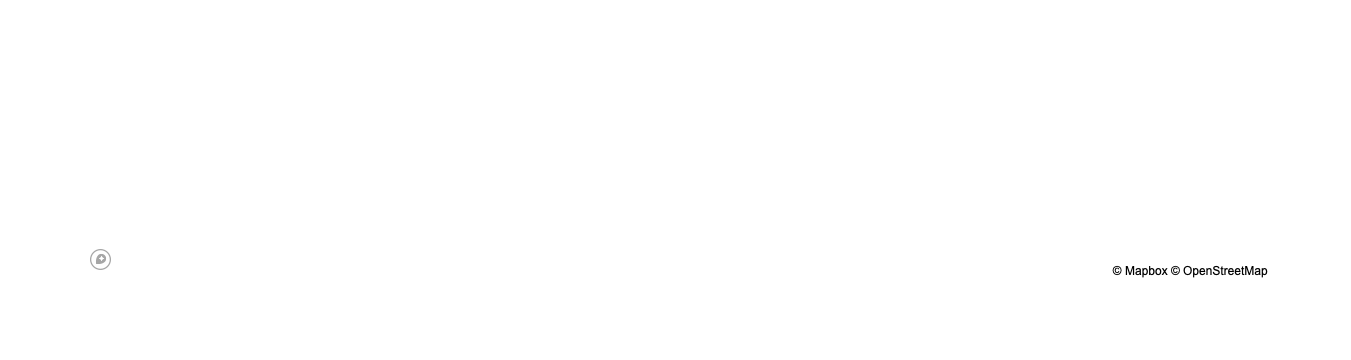

In [396]:
# check out the 149 locations on a map
px.set_mapbox_access_token("pk.eyJ1IjoibWhhcGljaCIsImEiOiJjbDA1c3BjcnowY3EwM2JvNWp5YXRiOTczIn0.RjY-1A9JdFVMlUkz68lu1Q")
fig = px.scatter_mapbox(pa_sub, lat="Latitude", lon="Longitude")
# first, just a basic scatter plot; next i'll add colors and size based on other variables
fig.show()

In [408]:
check_series=pa_sub['Rural Status'].fillna('unknown')
check_series.value_counts()
len(check_series)
len(pa_sub)
pa_sub.columns

Index(['HPSA Name', 'Designation Type', 'HPSA Score', 'HPSA Status',
       '% of Population Below 100% Poverty', 'Rural Status', 'Longitude',
       'Latitude', 'Common County Name', 'HPSA City',
       'HPSA Component Type Description',
       'HPSA Designation Population Type Description',
       'HPSA Population Type Code', 'HPSA Resident Civilian Population',
       'HPSA Shortage', 'Rural Status no NaN'],
      dtype='object')

In [411]:
pa_sub['Rural Status no NaN'].value_counts()

Non-Rural          194
unknown            163
Rural              119
Unknown             14
Partially Rural     10
Name: Rural Status no NaN, dtype: int64

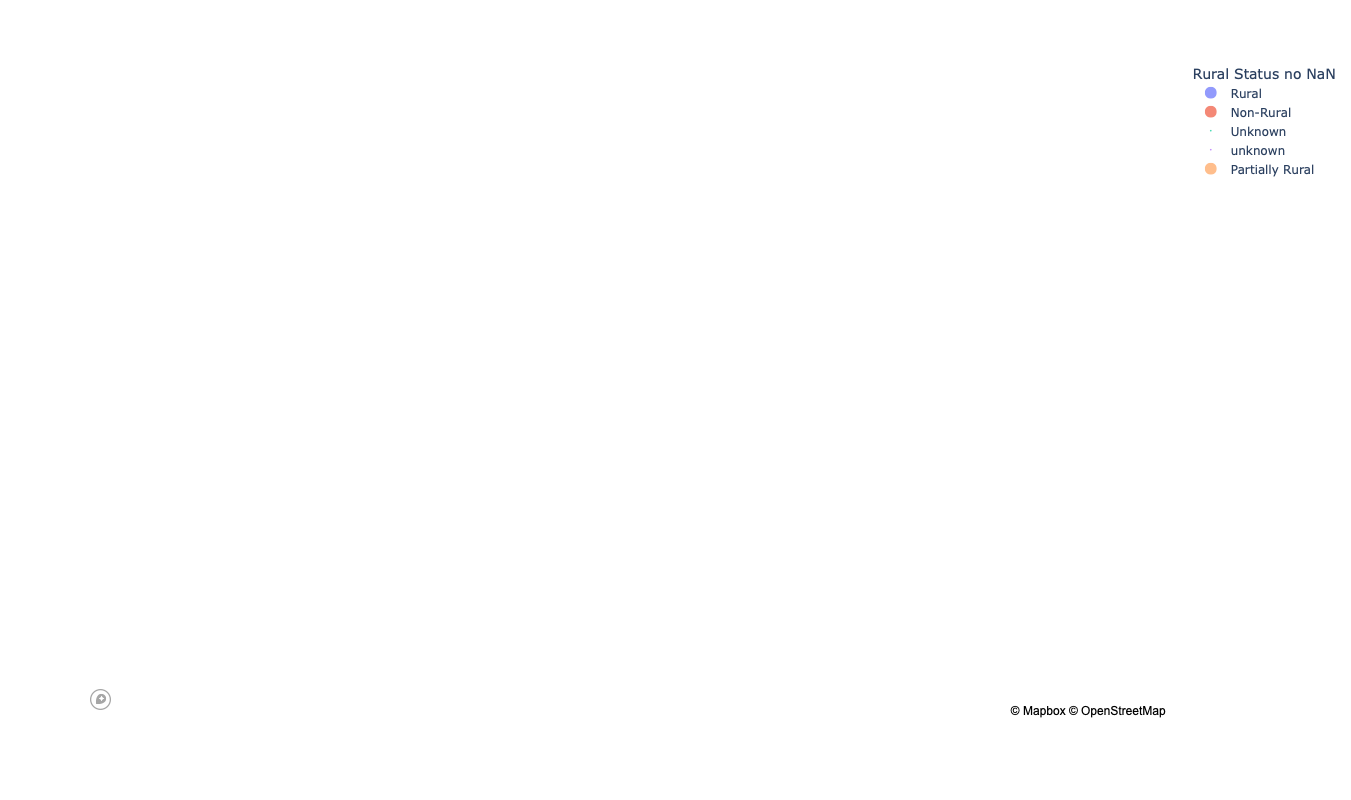

In [419]:
px.set_mapbox_access_token("pk.eyJ1IjoibWhhcGljaCIsImEiOiJjbDA1c3BjcnowY3EwM2JvNWp5YXRiOTczIn0.RjY-1A9JdFVMlUkz68lu1Q")
fig = px.scatter_mapbox(pa_sub, lat="Latitude", lon="Longitude", size="HPSA Score", color="Rural Status no NaN")
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,)
fig.show()